## import the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv('c:/pdata/train.csv')

NameError: name 'pd' is not defined

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Sex', ylabel='count'>

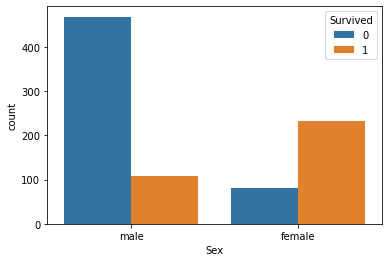

In [4]:
sns.countplot(x='Sex',data=data,hue='Survived')

<AxesSubplot:xlabel='Age', ylabel='Count'>

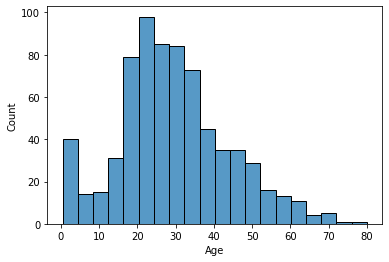

In [6]:
sns.histplot(data['Age'])

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

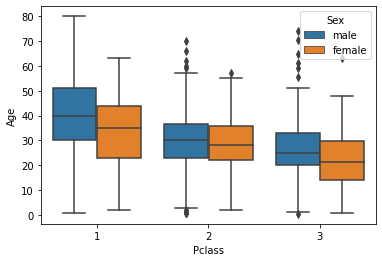

In [7]:
sns.boxplot(x='Pclass',y='Age',data=data,hue='Sex')

## 1-  Find missing values and fill them

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data['Age']=data['Age'].fillna(int(data['Age'].mean()))

In [10]:
mfv_embarked=data['Embarked'].describe()['top']

In [11]:
data['Embarked']=data['Embarked'].fillna(mfv_embarked)

In [12]:
mfv_cabin=data['Cabin'].describe()['top'][0]
print(mfv_cabin)

G


In [13]:
mfv_cabin=data['Cabin'].describe()['top']
data['Cabin']=data['Cabin'].fillna(mfv_cabin)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 2-  Drop Columns but convert Categorical Columns into Integers

In [15]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S


In [16]:
# 0 => male, 1=> female
data['Sex']=data['Sex'].replace(['male','female'],[0,1])

In [5]:
data.head()

NameError: name 'data' is not defined

In [3]:
# S= 0 , C=1, Q=2
data['Embarked']=data['Embarked'].replace(['S','C','Q'],[0,1,2])

NameError: name 'data' is not defined

In [4]:
data.head()

NameError: name 'data' is not defined

In [20]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.00,G6,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.00,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.0,1,2,W./C. 6607,23.45,G6,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.00,C148,1
890,891,0,3,"Dooley, Mr. Patrick",0,32.0,0,0,370376,7.75,G6,2


In [21]:
data=data.drop(['Name','Ticket','Cabin'],axis=1)

In [22]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


### Separate out the columns into X and Y

In [23]:
Y=data['Survived'] #output
X=data.drop(['Survived'],axis=1) #input

In [24]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.0,1,0,7.2500,0
1,2,1,1,38.0,1,0,71.2833,1
2,3,3,1,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,3,0,35.0,0,0,8.0500,0


In [25]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [26]:
data['Khalid']=123

In [27]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Khalid
0,1,0,3,0,22.0,1,0,7.2500,0,123
1,2,1,1,1,38.0,1,0,71.2833,1,123
2,3,1,3,1,26.0,0,0,7.9250,0,123
3,4,1,1,1,35.0,1,0,53.1000,0,123
4,5,0,3,0,35.0,0,0,8.0500,0,123


In [29]:
data=data.drop(['Khalid'],axis=1)

In [30]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


### Distinguish X and Y from data

In [34]:
y=data['Survived'] #output
x=data.drop(['Survived'],axis=1) #input

### Divide the data into two parts, 1- Train(70%)  2- Test(30%)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [37]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
520,521,1,1,30.0,0,0,93.5000,0
510,511,3,0,29.0,0,0,7.7500,2
446,447,2,1,13.0,0,1,19.5000,0
2,3,3,1,26.0,0,0,7.9250,0
691,692,3,1,4.0,0,1,13.4167,1
...,...,...,...,...,...,...,...,...
575,576,3,0,19.0,0,0,14.5000,0
838,839,3,0,32.0,0,0,56.4958,0
337,338,1,1,41.0,0,0,134.5000,1
523,524,1,1,44.0,0,1,57.9792,1


In [38]:
Y_train

520    1
510    1
446    1
2      1
691    1
      ..
575    0
838    1
337    1
523    1
863    0
Name: Survived, Length: 623, dtype: int64

In [39]:
X_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,332,1,0,45.5,0,0,28.5000,0
700,701,1,1,18.0,1,0,227.5250,1
748,749,1,0,19.0,1,0,53.1000,0
751,752,3,0,6.0,0,1,12.4750,0
481,482,2,0,29.0,0,0,0.0000,0
...,...,...,...,...,...,...,...,...
388,389,3,0,29.0,0,0,7.7292,2
416,417,2,1,34.0,1,1,32.5000,0
407,408,2,0,3.0,1,1,18.7500,0
482,483,3,0,50.0,0,0,8.0500,0


In [40]:
Y_test

331    0
700    1
748    0
751    1
481    0
      ..
388    0
416    1
407    1
482    0
829    1
Name: Survived, Length: 268, dtype: int64

## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lr=LogisticRegression()

## train on our data

In [43]:
lr.fit(X_train,Y_train)

C:\Users\Usman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
520,521,1,1,30.0,0,0,93.5000,0
510,511,3,0,29.0,0,0,7.7500,2
446,447,2,1,13.0,0,1,19.5000,0
2,3,3,1,26.0,0,0,7.9250,0
691,692,3,1,4.0,0,1,13.4167,1


In [ ]:
lr.predict([[567,1,0,55,2,2,200,1]])

## Accuracy

In [47]:
from sklearn.metrics import classification_report

In [48]:
Y_Pred=lr.predict(X_test)

In [49]:
print(classification_report(Y_Pred,Y_test))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       176
           1       0.64      0.79      0.71        92

    accuracy                           0.78       268
   macro avg       0.76      0.78      0.76       268
weighted avg       0.80      0.78      0.78       268

